# Prevendo a rotatividade de clientes (customer churn)

**Customer Churn** (ou Rotatividade de Clientes, em uma tradução livre) refere-se a uma decisão tomada pelo cliente sobre o término do relacionamento comercial. Refere-se também à perda de clientes. A fidelidade do cliente e a rotatividade de clientes sempre somam 100%.

Se uma empresa tem uma taxa de fidelidade de 60%, então a taxa de perda de clientes é de 40%. De acordo com a regra de lucratividade do cliente 80/20, 20% dos clientes estão gerando 80% da receita. Portanto, é muito importante prever os usuários que provavelmente abandonarão o relacionamento comercial e os fatores que afetam as decisões do cliente.

Neste projeto, você deve prever o Customer Churn em uma Operadora de Telecom.

In [1]:
# Importanto bibliotecas bases que devem ser usadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Importando datasets de treino e teste
df_teste = pd.read_csv("projeto4_telecom_teste.csv")
df_treino = pd.read_csv("projeto4_telecom_treino.csv")

In [3]:
# Visualizando dados
df_treino.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


## Exploração de dados

Etapa de exploração de dados.

In [4]:
df_teste.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,HI,101,area_code_510,no,no,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,no
1,2,MT,137,area_code_510,no,no,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,no
2,3,OH,103,area_code_408,no,yes,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,no
3,4,NM,99,area_code_415,no,no,0,216.8,123,36.86,...,88,10.74,220.6,82,9.93,15.7,2,4.24,1,no
4,5,SC,108,area_code_415,no,no,0,197.4,78,33.56,...,101,10.54,204.5,107,9.20,7.7,4,2.08,2,no


In [5]:
# Shape dos dados
df_treino.shape

(3333, 21)

In [6]:
df_teste.shape

(1667, 21)

In [7]:
# Tipos dos dados
df_treino.dtypes

Unnamed: 0                         int64
state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [8]:
# Número de valores únicos
df_treino.apply(set, axis=0).map(len)

Unnamed: 0                       3333
state                              51
account_length                    212
area_code                           3
international_plan                  2
voice_mail_plan                     2
number_vmail_messages              46
total_day_minutes                1667
total_day_calls                   119
total_day_charge                 1667
total_eve_minutes                1611
total_eve_calls                   123
total_eve_charge                 1440
total_night_minutes              1591
total_night_calls                 120
total_night_charge                933
total_intl_minutes                162
total_intl_calls                   21
total_intl_charge                 162
number_customer_service_calls      10
churn                               2
dtype: int64

In [9]:
# Removendo uma coluna redundante
df_treino = df_treino.drop(["Unnamed: 0"], axis=1)

<AxesSubplot:xlabel='churn', ylabel='count'>

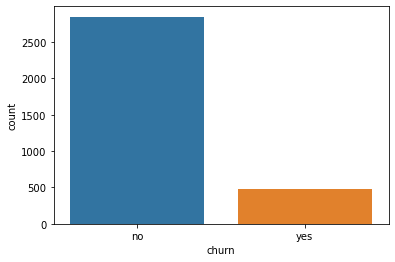

In [10]:
# Plotando Variável Target
import seaborn as sns

sns.countplot(x = "churn", data=df_treino)

<AxesSubplot:xlabel='area_code', ylabel='count'>

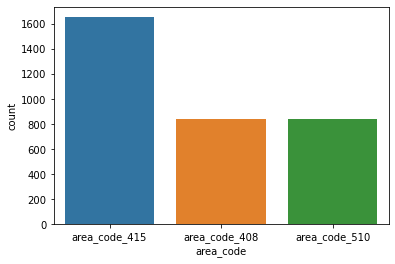

In [11]:
# Plotando Variáveis categóricas
sns.countplot(x = "area_code", data=df_treino)

<AxesSubplot:xlabel='international_plan', ylabel='count'>

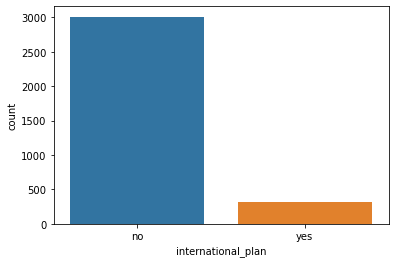

In [12]:
sns.countplot(x = "international_plan", data=df_treino)

<AxesSubplot:xlabel='voice_mail_plan', ylabel='count'>

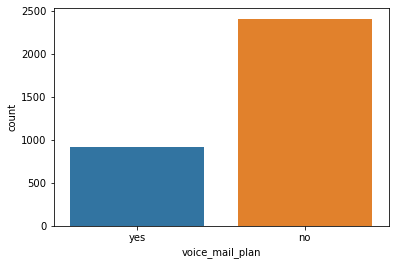

In [13]:
sns.countplot(x = "voice_mail_plan", data=df_treino)

In [14]:
# Variáveis Categóricas e Quantitativas
catVar = []
quantVar = []

colnome = df_treino.columns

for nome in colnome:
    if isinstance(df_treino.loc[0,nome], str):
        catVar.append(nome)
    else:
        quantVar.append(nome)

In [15]:
# plotando as variáveis categóricas e quantitativas
print("variável categórica:\n\n %s" %catVar)
print("\n\nvariável quantitativa:\n\n %s" %quantVar)

variável categórica:

 ['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']


variável quantitativa:

 ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


In [16]:
# data frame de variáveis quantitativas
df_quant_var = df_treino.loc[:,quantVar]
df_quant_var

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,68,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,28,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,184,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


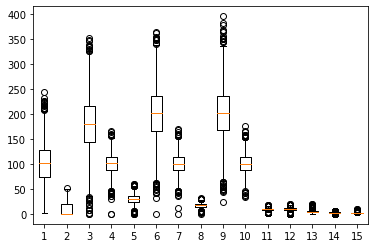

In [17]:
# Plotando boxplot
plt.boxplot(df_quant_var)
plt.show()

In [18]:
# Variável Quantitativa
df_treino_quant = df_treino.loc[:,quantVar]

In [19]:
# Matriz de Correlação
mat_corr = df_treino_quant.corr()

In [20]:
mat_corr

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
account_length,1.000000,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796
number_vmail_messages,-0.004628,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263
total_day_minutes,0.006216,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423
total_day_calls,0.038470,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942
total_day_charge,0.006214,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427
total_eve_minutes,-0.006757,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985
total_eve_calls,0.019260,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423
total_eve_charge,-0.006745,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987
total_night_minutes,-0.008955,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288
total_night_calls,-0.013176,0.007123,0.022972,-0.019557,0.022972,0.007586,0.007710,0.007596,0.011204,1.000000,0.011188,-0.013605,0.000305,-0.013630,-0.012802


In [21]:
# buscando valores com correlação 1 e são diferentes variáveis
dic = {}

for i in mat_corr.columns:
    for j in mat_corr.columns:
        if i == j:
            continue
        else:
            if mat_corr.loc[i,j] >= 0.5:
                dic.update({(i,j):mat_corr.loc[i,j]})

## Feature Selection

A seleção de atributos é a etapa de escolha de variáveis que farão parte do modelo. A escolha foi de tirar variáveis que possuem alta correlação entre si. As variáveis escolhidas tem correlações muito próximas a 1 e por isso serão retiradas da modelo.

In [22]:
# variáveis com correlações altas
dic

{('total_day_minutes', 'total_day_charge'): 0.9999999521904007,
 ('total_day_charge', 'total_day_minutes'): 0.9999999521904007,
 ('total_eve_minutes', 'total_eve_charge'): 0.9999997760198491,
 ('total_eve_charge', 'total_eve_minutes'): 0.9999997760198491,
 ('total_night_minutes', 'total_night_charge'): 0.9999992148758795,
 ('total_night_charge', 'total_night_minutes'): 0.9999992148758795,
 ('total_intl_minutes', 'total_intl_charge'): 0.9999927417510314,
 ('total_intl_charge', 'total_intl_minutes'): 0.9999927417510314}

In [23]:
# Como temos variáveis que possuem alta correlação entre si, vamos escolher uma dessas veriáveis que possuem
# alta correlação entre si. As variáveis são: total_day_minutes, total_eve_minutes, total_night_minutes,
# total_intl_minutes.
df_treino_fs = df_treino.drop(["total_day_charge", "total_eve_charge", "total_night_charge",
                               "total_intl_charge"], axis=1)
df_treino_fs

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,churn
0,KS,128,area_code_415,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,no
1,OH,107,area_code_415,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,no
2,NJ,137,area_code_415,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,no
3,OH,84,area_code_408,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,no
4,OK,75,area_code_415,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,area_code_415,no,yes,36,156.2,77,215.5,126,279.1,83,9.9,6,2,no
3329,WV,68,area_code_415,no,no,0,231.1,57,153.4,55,191.3,123,9.6,4,3,no
3330,RI,28,area_code_510,no,no,0,180.8,109,288.8,58,191.9,91,14.1,6,2,no
3331,CT,184,area_code_510,yes,no,0,213.8,105,159.6,84,139.2,137,5.0,10,2,no


## Transformação de variáveis (data munging/ data wrangling)

Nessa etapa, as variáveis são transformadas a fimde se adequarem

A variável *State* tem 51 classes e será aplicada uma transformação OneHotEncoder utilizando uma das divisões apresentadas a seguir.

Regiões Oficiais dos EUA
Áreas designadas pelo Censo (U.S. Census Bureau)

Divisão de acordo com o censo
Divisão regional usada pelo United States Census Bureau (Departamento de Comércio dos EUA):

Região 1 (Nordeste)
* Divisão 1 (Nova Inglaterra): Maine, New Hampshire, Vermont, Massachusetts, Rhode Island, Connecticut
* Divisão 2 (Meio Atlântico): Nova Iorque, Pensilvânia, Nova Jersey

Região 2 (Centro-Oeste) (Antes de Junho de 1984, a Região Centro-Oeste foi designada como Região Centro-Norte)
* Divisão 3 (Leste Centro-Norte): Wisconsin, Michigan, Illinois, Indiana, Ohio
* Divisão 4 (Oeste Centro-Norte): Missouri, Dakota do Sul, Dakota do Norte, Nebraska, Kansas, Minnesota, Iowa

Região 3 (Sul):
* Divisão 5 (Estados do Atlântico Sul): Delaware, Maryland, Distrito de Colúmbia, Virgínia, Virgínia Ocidental, Carolina do Norte, Carolina do Sul, Geórgia, Flórida
* Divisão 6 (Estados do Leste Centro-Sul): Kentucky, Tennessee, Mississippi, Alabama
* Divisão 7 (Estados do Oeste Centro-Sul): Oklahoma, Texas, Arkansas, Louisiana

Região 4 (Oeste)
* Divisão 8 (Mountain States): Idaho, Montana, Wyoming, Nevada, Utah, Colorado, Arizona, Novo México
* Divisão 9 (Pacific States): Califórnia, Oregon, Washington, Alasca, Havaí

Essa divisão a segue a divisão por região de acordo com o censo americano. A seguinte proposta é uma divisão dividida por regiões federais de acordo com OMB  (Office og Management and Budget/Escritório de Gestão e Orçamento).

* Região I: Connecticut, Maine, Massachusetts, New Hampshire, Vermont e Rhode Island
* Região II: Nova Jersey, Nova Iorque,além dos territórios de Porto Rico e Ilhas Virgens Americanas
* Região III: Delaware, Distrito de Colúmbia, Maryland, Pensilvânia, Virgínia, Virgínia Ocidental
* Região IV: Alabama, Flórida, Geórgia, Kentucky, Mississippi, Carolina do Norte, Carolina do Sul e Tennessee
* Região V: Illinois, Indiana, Michigan, Minnesota, Ohio e Wisconsin
* Região VI: Arkansas, Louisiana, Novo México, Oklahoma eTexas
* Região VII: Iowa, Kansas, Missouri e Nebraska
* Região VIII: Colorado, Montana, Dakota do Norte, Dakota do Sul, Utah e Wyoming
* Região IX: Arizona, Califórnia, Havaí, Nevada e os territórios de Samoa Americana, Guam e Marianas do Norte
* Região X: Alasca, Washington, Oregon e Idaho

In [24]:
# divisão em regiões segundo a OMB
# siglas: https://pt.wikipedia.org/wiki/Lista_de_abrevia%C3%A7%C3%B5es_postais_dos_Estados_Unidos

Reg1 = ["CT","ME","MA","NH","VT","RI"]
Reg2 = ["NJ","NY","PR","VI"]
Reg3 = ["DE","DC","MD","PA","VA","WV"]
Reg4 = ["AL","FL","GA","KY","MS","NC","SC","TN"]
Reg5 = ["IL","IN","MI","MN","OH","WI"]
Reg6 = ["AR","LA","NM","OK","TX"]
Reg7 = ["IA","KS","MO","NE"]
Reg8 = ["CO","MT","ND","SD","UT","WY"]
Reg9 = ["AZ","CA","HI","NV","AS","GU","MP"]
Reg10 = ["AK","WA","OR","ID"]

len(Reg1)+len(Reg2)+len(Reg3)+len(Reg4)+len(Reg5)+len(Reg6)+len(Reg7)+len(Reg8)+len(Reg9)+len(Reg10)

56

In [25]:
# estados presentes no data set
pd.unique(df_treino_fs.state)

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [26]:
# todos os estados americanos segundo o wikipedia
states = Reg1+Reg2+Reg3+Reg4+Reg5+Reg6+Reg7+Reg8+Reg9+Reg10
states

['CT',
 'ME',
 'MA',
 'NH',
 'VT',
 'RI',
 'NJ',
 'NY',
 'PR',
 'VI',
 'DE',
 'DC',
 'MD',
 'PA',
 'VA',
 'WV',
 'AL',
 'FL',
 'GA',
 'KY',
 'MS',
 'NC',
 'SC',
 'TN',
 'IL',
 'IN',
 'MI',
 'MN',
 'OH',
 'WI',
 'AR',
 'LA',
 'NM',
 'OK',
 'TX',
 'IA',
 'KS',
 'MO',
 'NE',
 'CO',
 'MT',
 'ND',
 'SD',
 'UT',
 'WY',
 'AZ',
 'CA',
 'HI',
 'NV',
 'AS',
 'GU',
 'MP',
 'AK',
 'WA',
 'OR',
 'ID']

In [27]:
# Estados que não estão no data set de treino
st_not_df = []
st_df = pd.unique(df_treino_fs.state)
for st in states:
    if st not in st_df:
        st_not_df.append(st)
st_not_df

['PR', 'VI', 'AS', 'GU', 'MP']

In [28]:
# verificando se o numero de estados não presente no data set é o mesmo do código anterior
len(states) - len(st_df)

5

In [29]:
# Redefinindo as regiões
Reg1 = ["CT","ME","MA","NH","VT","RI"]
Reg2 = ["NJ","NY"]
Reg3 = ["DE","DC","MD","PA","VA","WV"]
Reg4 = ["AL","FL","GA","KY","MS","NC","SC","TN"]
Reg5 = ["IL","IN","MI","MN","OH","WI"]
Reg6 = ["AR","LA","NM","OK","TX"]
Reg7 = ["IA","KS","MO","NE"]
Reg8 = ["CO","MT","ND","SD","UT","WY"]
Reg9 = ["AZ","CA","HI","NV"]
Reg10 = ["AK","WA","OR","ID"]

len(Reg1)+len(Reg2)+len(Reg3)+len(Reg4)+len(Reg5)+len(Reg6)+len(Reg7)+len(Reg8)+len(Reg9)+len(Reg10)

51

In [30]:
# Aplicando OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

#categories=[Reg1,Reg2,Reg3,Reg4,Reg5,Reg6,Reg7,Reg8,Reg9,Reg10]
arraystate = np.array(df_treino_fs.state)
arraystate = arraystate.reshape(len(arraystate), 1)
encoder = OneHotEncoder(sparse=False)
encoder = encoder.fit(arraystate)
enc_onehot = encoder.transform(arraystate)
print(enc_onehot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [31]:
# formato do array
enc_onehot.shape

(3333, 51)

In [32]:
# categorias
encoder.categories_

[array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
        'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
        'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
        'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
        'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)]

In [33]:
# transformando em dataframe
df_enc_state = pd.DataFrame(enc_onehot,columns=encoder.categories_)
df_enc_state

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3331,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# Colocando os estados em regiões específicas
Regiao1 = df_enc_state.loc[:,Reg1].sum(axis=1)
Regiao2 = df_enc_state.loc[:,Reg2].sum(axis=1)
Regiao3 = df_enc_state.loc[:,Reg3].sum(axis=1)
Regiao4 = df_enc_state.loc[:,Reg4].sum(axis=1)
Regiao5 = df_enc_state.loc[:,Reg5].sum(axis=1)
Regiao6 = df_enc_state.loc[:,Reg6].sum(axis=1)
Regiao7 = df_enc_state.loc[:,Reg7].sum(axis=1)
Regiao8 = df_enc_state.loc[:,Reg8].sum(axis=1)
Regiao9 = df_enc_state.loc[:,Reg9].sum(axis=1)
Regiao10 = df_enc_state.loc[:,Reg10].sum(axis=1)

In [35]:
# transformando em dataframe
df_reg = pd.DataFrame({"Regiao1":Regiao1,"Regiao2":Regiao2,"Regiao3":Regiao3,"Regiao4":Regiao4,
              "Regiao5":Regiao5,"Regiao6":Regiao6,"Regiao7":Regiao7,"Regiao8":Regiao8,
              "Regiao9":Regiao9,"Regiao10":Regiao10})
df_reg

,Regiao1,Regiao2,Regiao3,Regiao4,Regiao5,Regiao6,Regiao7,Regiao8,Regiao9,Regiao10
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3329,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3330,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3331,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# validando o número de estados do data set
len(df_reg[df_reg.Regiao1 == 1])+len(df_reg[df_reg.Regiao2 == 1])+len(df_reg[df_reg.Regiao3 == 1])+len(df_reg[df_reg.Regiao4 == 1])+len(df_reg[df_reg.Regiao5 == 1])+len(df_reg[df_reg.Regiao6 == 1])+len(df_reg[df_reg.Regiao7 == 1])+len(df_reg[df_reg.Regiao8 == 1])+len(df_reg[df_reg.Regiao9 == 1])+len(df_reg[df_reg.Regiao10 == 1])

3333

In [37]:
# novo dataset de treino
df_treino_enc = pd.concat([df_reg, df_treino_fs], axis=1)
df_treino_enc

,Regiao1,Regiao2,Regiao3,Regiao4,Regiao5,Regiao6,Regiao7,Regiao8,Regiao9,Regiao10,...,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,churn
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,265.1,110,197.4,99,244.7,91,10.0,3,1,no
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,161.6,123,195.5,103,254.4,103,13.7,3,1,no
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,243.4,114,121.2,110,162.6,104,12.2,5,0,no
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,299.4,71,61.9,88,196.9,89,6.6,7,2,no
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,166.7,113,148.3,122,186.9,121,10.1,3,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,156.2,77,215.5,126,279.1,83,9.9,6,2,no
3329,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,231.1,57,153.4,55,191.3,123,9.6,4,3,no
3330,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,180.8,109,288.8,58,191.9,91,14.1,6,2,no
3331,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,213.8,105,159.6,84,139.2,137,5.0,10,2,no


In [38]:
# Aplicando label encoder
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
le1.fit(df_treino_enc.international_plan)
ip = le1.transform(df_treino_enc.international_plan)
ip

array([0, 0, 0, ..., 0, 1, 0])

In [39]:
le2 = LabelEncoder()
le2.fit(df_treino_enc.voice_mail_plan)
vp = le2.transform(df_treino_enc.voice_mail_plan)
vp

array([1, 1, 0, ..., 0, 0, 1])

In [40]:
le3 = LabelEncoder()
le3.fit(df_treino_enc.churn)
ch = le3.transform(df_treino_enc.churn)
ch

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
le4 = LabelEncoder()
le4.fit(df_treino_enc.area_code)
ac = le4.transform(df_treino_enc.area_code)
ac

array([1, 1, 1, ..., 2, 2, 1])

In [42]:
# Substituindo no data set as novas variáveis numéricas
df_treino_enc.loc[:,"international_plan"] = ip
df_treino_enc.loc[:,"international_plan"]

0       0
1       0
2       0
3       1
4       1
       ..
3328    0
3329    0
3330    0
3331    1
3332    0
Name: international_plan, Length: 3333, dtype: int64

In [43]:
df_treino_enc.loc[:,"voice_mail_plan"] = vp
df_treino_enc.loc[:,"voice_mail_plan"]

0       1
1       1
2       0
3       0
4       0
       ..
3328    1
3329    0
3330    0
3331    0
3332    1
Name: voice_mail_plan, Length: 3333, dtype: int64

In [44]:
df_treino_enc.loc[:,"churn"] = ch
df_treino_enc.loc[:,"churn"]

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: churn, Length: 3333, dtype: int64

In [45]:
df_treino_enc.loc[:,"area_code"] = ac
df_treino_enc.loc[:,"area_code"]

0       1
1       1
2       1
3       0
4       1
       ..
3328    1
3329    1
3330    2
3331    2
3332    1
Name: area_code, Length: 3333, dtype: int64

In [46]:
# Novo dado de treino
df_treino_enc = df_treino_enc.drop(["state"], axis=1)
df_treino_enc

,Regiao1,Regiao2,Regiao3,Regiao4,Regiao5,Regiao6,Regiao7,Regiao8,Regiao9,Regiao10,...,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,churn
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,166.7,113,148.3,122,186.9,121,10.1,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,156.2,77,215.5,126,279.1,83,9.9,6,2,0
3329,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,231.1,57,153.4,55,191.3,123,9.6,4,3,0
3330,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,180.8,109,288.8,58,191.9,91,14.1,6,2,0
3331,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,213.8,105,159.6,84,139.2,137,5.0,10,2,0


## Exploração de dados (parte 2)

Continuando a exploração de dados após a trasformação

In [47]:
# Calculando correlações novamente (após a entrada de novas variáveis)
mat_corr_2 = df_treino_enc.corr()
mat_corr_2

,Regiao1,Regiao2,Regiao3,Regiao4,Regiao5,Regiao6,Regiao7,Regiao8,Regiao9,Regiao10,...,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,churn
Regiao1,1.000000,-0.079875,-0.137897,-0.154403,-0.143370,-0.115529,-0.101679,-0.136369,-0.096762,-0.108644,...,-0.012834,-0.008146,0.034554,-0.031323,0.028336,-0.012646,-0.029175,0.004005,-0.010112,0.004638
Regiao2,-0.079875,1.000000,-0.081926,-0.091732,-0.085178,-0.068637,-0.060408,-0.081018,-0.057487,-0.064546,...,0.019385,-0.014723,-0.014619,0.015842,0.016368,-0.004075,0.009286,0.016182,0.021946,0.045564
Regiao3,-0.137897,-0.081926,1.000000,-0.158367,-0.147052,-0.118496,-0.104290,-0.139870,-0.099246,-0.111433,...,0.000443,0.020606,-0.029773,-0.015461,0.018865,-0.035999,0.029750,-0.022207,-0.010703,-0.015132
Regiao4,-0.154403,-0.091732,-0.158367,1.000000,-0.164653,-0.132679,-0.116772,-0.156612,-0.111125,-0.124771,...,-0.005470,0.017487,0.016079,0.040200,-0.033194,0.002055,0.003690,-0.031593,0.016228,0.007752
Regiao5,-0.143370,-0.085178,-0.147052,-0.164653,1.000000,-0.123199,-0.108429,-0.145422,-0.103185,-0.115856,...,0.022964,0.005839,0.007111,0.008503,0.013475,0.031893,-0.000755,-0.023336,-0.026084,-0.005157
Regiao6,-0.115529,-0.068637,-0.118496,-0.132679,-0.123199,1.000000,-0.087373,-0.117182,-0.083148,-0.093358,...,-0.012617,0.016686,-0.000700,0.013536,-0.008377,0.004472,0.001903,0.030919,0.033887,0.013027
Regiao7,-0.101679,-0.060408,-0.104290,-0.116772,-0.108429,-0.087373,1.000000,-0.103134,-0.073179,-0.082166,...,0.000101,-0.003466,0.009717,0.020168,0.015306,0.005500,0.009485,0.009418,-0.015910,-0.021480
Regiao8,-0.136369,-0.081018,-0.139870,-0.156612,-0.145422,-0.117182,-0.103134,1.000000,-0.098146,-0.110198,...,0.015262,-0.047111,0.016664,-0.012922,-0.034334,-0.004347,-0.010857,0.020831,-0.013933,-0.007018
Regiao9,-0.096762,-0.057487,-0.099246,-0.111125,-0.103185,-0.083148,-0.073179,-0.098146,1.000000,-0.078192,...,-0.018248,0.018695,-0.031136,-0.004506,0.003458,-0.000396,-0.004397,0.010358,-0.000129,-0.004997
Regiao10,-0.108644,-0.064546,-0.111433,-0.124771,-0.115856,-0.093358,-0.082166,-0.110198,-0.078192,1.000000,...,-0.010115,-0.008958,-0.024030,-0.033330,-0.009734,0.014920,-0.006326,0.004489,0.015570,-0.006202


In [48]:
# buscando valores com correlação mais altas e são diferentes variáveis
dic2 = {}

for i in mat_corr_2.columns:
    for j in mat_corr_2.columns:
        if i == j:
            continue
        else:
            if abs(mat_corr_2.loc[i,j]) >= 0.5:
                dic.update({(i,j):mat_corr_2.loc[i,j]})

In [49]:
dic2

{}

## Data Wrangling

Aplicando outras técnicas para preparar os dados para o modelo de regressão logística.

In [50]:
# Aplicando a técnica de padronização
from sklearn.preprocessing import StandardScaler

X = df_treino_enc.iloc[:,0:24]
Y = df_treino_enc.iloc[:,24]

scaler = StandardScaler()
scaler.fit(X)
X_standardization = scaler.transform(X)

In [51]:
df_standadization = pd.DataFrame(X_standardization)
df_standadization

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-0.366668,-0.217840,-0.376083,-0.421097,-0.391009,-0.315078,3.606134,-0.371914,-0.263895,-0.2963,...,1.234883,1.566767,0.476643,-0.070610,-0.055940,0.866743,-0.465494,-0.085008,-0.601195,-0.427932
1,-0.366668,-0.217840,-0.376083,-0.421097,2.557484,-0.315078,-0.277305,-0.371914,-0.263895,-0.2963,...,1.307948,-0.333738,1.124503,-0.108080,0.144867,1.058571,0.147825,1.240482,-0.601195,-0.427932
2,-0.366668,4.590517,-0.376083,-0.421097,-0.391009,-0.315078,-0.277305,-0.371914,-0.263895,-0.2963,...,-0.591760,1.168304,0.675985,-1.573383,0.496279,-0.756869,0.198935,0.703121,0.211534,-1.188218
3,-0.366668,-0.217840,-0.376083,-0.421097,2.557484,-0.315078,-0.277305,-0.371914,-0.263895,-0.2963,...,-0.591760,2.196596,-1.466936,-2.742865,-0.608159,-0.078551,-0.567714,-1.303026,1.024263,0.332354
4,-0.366668,-0.217840,-0.376083,-0.421097,-0.391009,3.173813,-0.277305,-0.371914,-0.263895,-0.2963,...,-0.591760,-0.240090,0.626149,-1.038932,1.098699,-0.276311,1.067803,-0.049184,-0.601195,1.092641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,-0.366668,-0.217840,-0.376083,-0.421097,-0.391009,-0.315078,-0.277305,-0.371914,3.789386,-0.2963,...,2.038605,-0.432895,-1.167924,0.286348,1.299506,1.547039,-0.874374,-0.120832,0.617898,0.332354
3329,-0.366668,-0.217840,2.658988,-0.421097,-0.391009,-0.315078,-0.277305,-0.371914,-0.263895,-0.2963,...,-0.591760,0.942447,-2.164631,-0.938353,-2.264816,-0.189297,1.170023,-0.228304,-0.194831,1.092641
3330,2.727265,-0.217840,-0.376083,-0.421097,-0.391009,-0.315078,-0.277305,-0.371914,-0.263895,-0.2963,...,-0.591760,0.018820,0.426808,1.731930,-2.114211,-0.177431,-0.465494,1.383778,0.617898,0.332354
3331,2.727265,-0.217840,-0.376083,-0.421097,-0.391009,-0.315078,-0.277305,-0.371914,-0.263895,-0.2963,...,-0.591760,0.624778,0.227466,-0.816080,-0.808966,-1.219628,1.885562,-1.876211,2.243356,0.332354


In [52]:
# Aplicando o principal component analysis (PCA) para redução de dimensionalidade do data set
from sklearn.decomposition import PCA

X_new = df_standadization.iloc[:,:]

pca = PCA(n_components=10)
pca.fit(X_new)
array_treino_pca_X = pca.transform(X_new)

In [53]:
array_treino_pca_X.shape

(3333, 10)

In [54]:
# Criando o novo data frame resultante da técnica PCA
df_treino_pca_X = pd.DataFrame(array_treino_pca_X, columns=["va1","var2","var3","var4","var5","var6","var7",
                                                            "var8","var9","var10"])
df_treino_pca_X

,va1,var2,var3,var4,var5,var6,var7,var8,var9,var10
0,1.976815,-0.103086,0.268064,0.820332,-0.052281,-0.619941,0.433216,3.351487,0.336504,0.582396
1,2.111376,-1.082777,-0.699046,1.986735,-0.481628,-0.387881,0.113732,-0.312574,0.752845,-0.363279
2,-0.981473,-0.616157,0.513740,0.765075,1.175802,-0.793479,0.859405,0.277420,-0.329735,-0.396613
3,-0.813536,-0.393762,-1.388279,2.533454,0.816212,-0.074736,0.186893,-1.675907,-0.020697,-0.401001
4,-0.993273,-1.061440,0.050247,-0.249377,0.533436,-1.365634,1.964922,-1.382678,-1.932729,-0.283993
...,...,...,...,...,...,...,...,...,...,...
3328,2.557809,0.136581,1.327342,-0.019237,0.143361,-1.486469,0.909626,-0.418095,2.859969,0.323081
3329,-0.867302,0.286563,1.276619,0.563284,0.286199,0.736461,-2.069829,-0.066566,-1.204346,-1.383786
3330,-0.797422,1.753896,-0.236187,-0.074463,-2.026278,1.252825,0.282901,0.093298,-1.248633,1.045495
3331,-0.780271,1.121339,-0.705062,0.771878,-0.420681,0.733838,1.643031,-1.322991,-1.461040,2.689006


In [55]:
# Criando modelo de regressão logística e avaliando a capacidade de generalização do modelo

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

clr = LogisticRegression(random_state=0)

accuracy = cross_val_score(clr, df_treino_pca_X, Y, cv=5, scoring="accuracy")
precision = cross_val_score(clr, df_treino_pca_X, Y, cv=5, scoring="precision")
recall = cross_val_score(clr, df_treino_pca_X, Y, cv=5, scoring="recall")
roc = cross_val_score(clr, df_treino_pca_X, Y, cv=5, scoring="roc_auc")

print('Accuracy: %.3f (%.3f)\n\n' % (mean(accuracy), std(accuracy)))
print('Precision: %.3f (%.3f)\n\n' % (mean(precision), std(precision)))
print('Recall: %.3f (%.3f)\n\n' % (mean(recall), std(recall)))
print('Roc_Auc: %.3f (%.3f)' % (mean(roc), std(roc)))

Accuracy: 0.856 (0.002)


Precision: 0.559 (0.146)


Recall: 0.029 (0.014)


Roc_Auc: 0.682 (0.029)


In [56]:
# Balanceamento de dados (imbalanced-learn)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)

X_res, y_res = smote.fit_resample(df_treino_pca_X, Y)

In [57]:
# Data set balanceado
df_balanced = pd.concat([X_res, y_res], axis=1)
df_balanced

,va1,var2,var3,var4,var5,var6,var7,var8,var9,var10,churn
0,1.976815,-0.103086,0.268064,0.820332,-0.052281,-0.619941,0.433216,3.351487,0.336504,0.582396,0
1,2.111376,-1.082777,-0.699046,1.986735,-0.481628,-0.387881,0.113732,-0.312574,0.752845,-0.363279,0
2,-0.981473,-0.616157,0.513740,0.765075,1.175802,-0.793479,0.859405,0.277420,-0.329735,-0.396613,0
3,-0.813536,-0.393762,-1.388279,2.533454,0.816212,-0.074736,0.186893,-1.675907,-0.020697,-0.401001,0
4,-0.993273,-1.061440,0.050247,-0.249377,0.533436,-1.365634,1.964922,-1.382678,-1.932729,-0.283993,0
...,...,...,...,...,...,...,...,...,...,...,...
5695,-0.841730,-1.310854,-0.633792,-1.432406,-0.907275,0.828535,-0.120967,-0.145240,0.522637,-0.224697,1
5696,-0.632816,0.417816,-0.930338,0.634952,2.451473,1.540591,0.343102,-0.256703,-0.747243,1.227304,1
5697,-0.819688,-0.399096,0.641280,0.623502,0.243684,1.069543,-2.022440,-0.233917,-1.640857,-1.277905,1
5698,-0.845075,-0.832826,-0.681713,0.864852,-0.609006,-0.598640,-0.099493,-0.687629,0.062708,-0.507871,1


num 0: 2850.00
num 1: 2850.00


/home/luizin/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


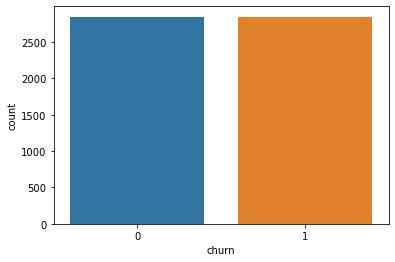

In [58]:
import seaborn as sns

sns.countplot("churn", data=df_balanced)

zeros_balan = (df_balanced.churn == 0).sum()
ones_balan = (df_balanced.churn == 1).sum()

print("num 0: %0.2f\nnum 1: %0.2f" %(zeros_balan, ones_balan))

In [59]:
# Segundo modelo de regressão logística depois do balanceamento de dados
df_balanced_X = df_balanced.iloc[:,0:10]
df_balanced_Y = df_balanced.iloc[:,10]

clr = LogisticRegression(random_state=0)

accuracy2 = cross_val_score(clr, df_balanced_X, df_balanced_Y, cv=5, scoring="accuracy")
precision2 = cross_val_score(clr, df_balanced_X, df_balanced_Y, cv=5, scoring="precision")
recall2 = cross_val_score(clr, df_balanced_X, df_balanced_Y, cv=5, scoring="recall")
roc2 = cross_val_score(clr, df_balanced_X, df_balanced_Y, cv=5, scoring="roc_auc")

print('Accuracy: %.3f (%.3f)\n\n' % (mean(accuracy2), std(accuracy2)))
print('Precision: %.3f (%.3f)\n\n' % (mean(precision2), std(precision2)))
print('Recall: %.3f (%.3f)\n\n' % (mean(recall2), std(recall2)))
print('Roc_Auc: %.3f (%.3f)' % (mean(roc2), std(roc2)))

Accuracy: 0.620 (0.021)


Precision: 0.617 (0.022)


Recall: 0.636 (0.015)


Roc_Auc: 0.684 (0.019)


In [63]:
# Ajuste de parâmetros
from sklearn.model_selection import GridSearchCV

param_grid = {'penalty' : ['l1', 'l2'],'C' : np.logspace(-4, 4, 20),'solver' : ['liblinear']}

clr = LogisticRegression(random_state=0)

search1 = GridSearchCV(clr, param_grid, scoring='roc_auc',n_jobs=-1, cv=5)

search1.fit(df_balanced_X, df_balanced_Y)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='roc_auc')

In [64]:
# Resultado dos testes
search1.best_params_, search1.best_score_, search1.best_index_

({'C': 0.012742749857031334, 'penalty': 'l1', 'solver': 'liblinear'},
 0.6858233302554633,
 10)

In [65]:
# Novo modelo
clr2 = LogisticRegression(C=0.03359818286283781, penalty='l1', solver='liblinear',random_state=0)

accuracy3 = cross_val_score(clr2, df_balanced_X, df_balanced_Y, cv=5, scoring="accuracy")
precision3 = cross_val_score(clr2, df_balanced_X, df_balanced_Y, cv=5, scoring="precision")
recall3 = cross_val_score(clr2, df_balanced_X, df_balanced_Y, cv=5, scoring="recall")
roc3 = cross_val_score(clr2, df_balanced_X, df_balanced_Y, cv=5, scoring="roc_auc")

print('Accuracy: %.3f (%.3f)\n\n' % (mean(accuracy3), std(accuracy3)))
print('Precision: %.3f (%.3f)\n\n' % (mean(precision3), std(precision3)))
print('Recall: %.3f (%.3f)\n\n' % (mean(recall3), std(recall3)))
print('Roc_Auc: %.3f (%.3f)' % (mean(roc3), std(roc3)))

Accuracy: 0.623 (0.015)


Precision: 0.613 (0.016)


Recall: 0.669 (0.011)


Roc_Auc: 0.685 (0.020)


In [68]:
# dado de teste
df_teste = df_teste.drop(["Unnamed: 0"],axis=1)
df_teste

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,HI,101,area_code_510,no,no,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,no
1,MT,137,area_code_510,no,no,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,no
2,OH,103,area_code_408,no,yes,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,no
3,NM,99,area_code_415,no,no,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,no
4,SC,108,area_code_415,no,no,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no
1663,WV,152,area_code_415,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,yes
1664,DC,61,area_code_415,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,no
1665,DC,109,area_code_510,no,no,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0,no


In [71]:
# Número de valores únicos
df_treino.apply(set, axis=0).map(len)

state                              51
account_length                    212
area_code                           3
international_plan                  2
voice_mail_plan                     2
number_vmail_messages              46
total_day_minutes                1667
total_day_calls                   119
total_day_charge                 1667
total_eve_minutes                1611
total_eve_calls                   123
total_eve_charge                 1440
total_night_minutes              1591
total_night_calls                 120
total_night_charge                933
total_intl_minutes                162
total_intl_calls                   21
total_intl_charge                 162
number_customer_service_calls      10
churn                               2
dtype: int64

In [72]:
# Aplicando a seleção de atributos
df_teste_fs = df_teste.drop(["total_day_charge", "total_eve_charge", "total_night_charge",
                               "total_intl_charge"], axis=1)
df_teste_fs

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,churn
0,HI,101,area_code_510,no,no,0,70.9,123,211.9,73,236.0,73,10.6,3,3,no
1,MT,137,area_code_510,no,no,0,223.6,86,244.8,139,94.2,81,9.5,7,0,no
2,OH,103,area_code_408,no,yes,29,294.7,95,237.3,105,300.3,127,13.7,6,1,no
3,NM,99,area_code_415,no,no,0,216.8,123,126.4,88,220.6,82,15.7,2,1,no
4,SC,108,area_code_415,no,no,0,197.4,78,124.0,101,204.5,107,7.7,4,2,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,HI,50,area_code_408,no,yes,40,235.7,127,223.0,126,297.5,116,9.9,5,2,no
1663,WV,152,area_code_415,no,no,0,184.2,90,256.8,73,213.6,113,14.7,2,3,yes
1664,DC,61,area_code_415,no,no,0,140.6,89,172.8,128,212.4,97,13.6,4,1,no
1665,DC,109,area_code_510,no,no,0,188.8,67,171.7,92,224.4,89,8.5,6,0,no


In [73]:
# Aplicando OneHotEncode
arraystate2 = np.array(df_teste_fs.state)
arraystate2 = arraystate2.reshape(len(arraystate2), 1)
enc_onehot2 = encoder.transform(arraystate2)
print(enc_onehot2)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [75]:
# transformando em dataframe
df_enc_state2 = pd.DataFrame(enc_onehot2,columns=encoder.categories_)
df_enc_state2

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
# Colocando os estados em regiões específicas
Regiao12 = df_enc_state2.loc[:,Reg1].sum(axis=1)
Regiao22 = df_enc_state2.loc[:,Reg2].sum(axis=1)
Regiao32 = df_enc_state2.loc[:,Reg3].sum(axis=1)
Regiao42 = df_enc_state2.loc[:,Reg4].sum(axis=1)
Regiao52 = df_enc_state2.loc[:,Reg5].sum(axis=1)
Regiao62 = df_enc_state2.loc[:,Reg6].sum(axis=1)
Regiao72 = df_enc_state2.loc[:,Reg7].sum(axis=1)
Regiao82 = df_enc_state2.loc[:,Reg8].sum(axis=1)
Regiao92 = df_enc_state2.loc[:,Reg9].sum(axis=1)
Regiao102 = df_enc_state2.loc[:,Reg10].sum(axis=1)

In [77]:
# transformando em dataframe
df_reg2 = pd.DataFrame({"Regiao1":Regiao12,"Regiao2":Regiao22,"Regiao3":Regiao32,"Regiao4":Regiao42,
              "Regiao5":Regiao52,"Regiao6":Regiao62,"Regiao7":Regiao72,"Regiao8":Regiao82,
              "Regiao9":Regiao92,"Regiao10":Regiao102})
df_reg2

,Regiao1,Regiao2,Regiao3,Regiao4,Regiao5,Regiao6,Regiao7,Regiao8,Regiao9,Regiao10
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1663,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1664,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1665,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
# novo dataset de treino
df_teste_enc = pd.concat([df_reg2, df_teste_fs], axis=1)
df_teste_enc

,Regiao1,Regiao2,Regiao3,Regiao4,Regiao5,Regiao6,Regiao7,Regiao8,Regiao9,Regiao10,...,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,churn
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,70.9,123,211.9,73,236.0,73,10.6,3,3,no
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,223.6,86,244.8,139,94.2,81,9.5,7,0,no
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,294.7,95,237.3,105,300.3,127,13.7,6,1,no
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,216.8,123,126.4,88,220.6,82,15.7,2,1,no
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,197.4,78,124.0,101,204.5,107,7.7,4,2,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,235.7,127,223.0,126,297.5,116,9.9,5,2,no
1663,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,184.2,90,256.8,73,213.6,113,14.7,2,3,yes
1664,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,140.6,89,172.8,128,212.4,97,13.6,4,1,no
1665,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,188.8,67,171.7,92,224.4,89,8.5,6,0,no


In [79]:
# Aplicando label encoder
from sklearn.preprocessing import LabelEncoder

ip2 = le1.transform(df_teste_enc.international_plan)

vp2 = le2.transform(df_teste_enc.voice_mail_plan)

ch2 = le3.transform(df_teste_enc.churn)

ac2 = le4.transform(df_teste_enc.area_code)

# Substituindo no data set as novas variáveis numéricas
df_teste_enc.loc[:,"international_plan"] = ip2

df_teste_enc.loc[:,"voice_mail_plan"] = vp2

df_teste_enc.loc[:,"churn"] = ch2

df_teste_enc.loc[:,"area_code"] = ac2

In [80]:
# Novo dado de treino
df_teste_enc = df_teste_enc.drop(["state"], axis=1)
df_teste_enc

,Regiao1,Regiao2,Regiao3,Regiao4,Regiao5,Regiao6,Regiao7,Regiao8,Regiao9,Regiao10,...,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,churn
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,70.9,123,211.9,73,236.0,73,10.6,3,3,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,223.6,86,244.8,139,94.2,81,9.5,7,0,0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,294.7,95,237.3,105,300.3,127,13.7,6,1,0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,216.8,123,126.4,88,220.6,82,15.7,2,1,0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,197.4,78,124.0,101,204.5,107,7.7,4,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,235.7,127,223.0,126,297.5,116,9.9,5,2,0
1663,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,184.2,90,256.8,73,213.6,113,14.7,2,3,1
1664,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,140.6,89,172.8,128,212.4,97,13.6,4,1,0
1665,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,188.8,67,171.7,92,224.4,89,8.5,6,0,0


In [81]:
# Aplicando padronização
X_teste = df_teste_enc.iloc[:,0:24]
Y_teste = df_teste_enc.iloc[:,24]

X_stand_teste = scaler.transform(X_teste)

In [82]:
df_stand_teste = pd.DataFrame(X_stand_teste)
df_stand_teste

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-0.366668,-0.21784,-0.376083,-0.421097,-0.391009,-0.315078,-0.277305,-0.371914,3.789386,-0.2963,...,-0.591760,-1.999204,1.124503,0.215351,-1.361185,0.694692,-1.385473,0.129936,-0.601195,1.092641
1,-0.366668,-0.21784,-0.376083,-0.421097,-0.391009,-0.315078,-0.277305,2.688797,-0.263895,-0.2963,...,-0.591760,0.804729,-0.719406,0.864187,1.952128,-2.109550,-0.976594,-0.264128,1.024263,-1.188218
2,-0.366668,-0.21784,-0.376083,-0.421097,2.557484,-0.315078,-0.277305,-0.371914,-0.263895,-0.2963,...,1.527146,2.110293,-0.270887,0.716276,0.245270,1.966291,1.374463,1.240482,0.617898,-0.427932
3,-0.366668,-0.21784,-0.376083,-0.421097,-0.391009,3.173813,-0.277305,-0.371914,-0.263895,-0.2963,...,-0.591760,0.679865,1.124503,-1.470832,-0.608159,0.390141,-0.925484,1.956963,-1.007560,-0.427932
4,-0.366668,-0.21784,-0.376083,2.374751,-0.391009,-0.315078,-0.277305,-0.371914,-0.263895,-0.2963,...,-0.591760,0.323635,-1.118088,-1.518163,0.044463,0.071747,0.352264,-0.908961,-0.194831,0.332354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,-0.366668,-0.21784,-0.376083,-0.421097,-0.391009,-0.315078,-0.277305,-0.371914,3.789386,-0.2963,...,2.330868,1.026913,1.323844,0.434259,1.299506,1.910918,0.812254,-0.120832,0.211534,0.332354
1663,-0.366668,-0.21784,2.658988,-0.421097,-0.391009,-0.315078,-0.277305,-0.371914,-0.263895,-0.2963,...,-0.591760,0.081252,-0.520064,1.100844,-1.361185,0.251709,0.658924,1.598722,-1.007560,1.092641
1664,-0.366668,-0.21784,2.658988,-0.421097,-0.391009,-0.315078,-0.277305,-0.371914,-0.263895,-0.2963,...,-0.591760,-0.719347,-0.569899,-0.555757,1.399910,0.227977,-0.158835,1.204658,-0.194831,-0.427932
1665,-0.366668,-0.21784,2.658988,-0.421097,-0.391009,-0.315078,-0.277305,-0.371914,-0.263895,-0.2963,...,-0.591760,0.165719,-1.666277,-0.577451,-0.407352,0.465290,-0.567714,-0.622369,0.617898,-1.188218


In [84]:
# Aplicando PCA

array_stand_pca = pca.transform(df_stand_teste)
array_stand_pca

array([[-0.90044435,  0.01931761,  1.56259838, ..., -0.740043  ,
         2.59534487,  0.33964793],
       [-0.70703951,  1.1166057 , -1.04787494, ...,  0.28168551,
         0.31647755,  0.49960716],
       [ 2.33749732, -0.47248086, -1.49796837, ..., -0.03099169,
         0.39037949, -0.3904527 ],
       ...,
       [-0.9044075 , -1.07710571,  1.82501532, ...,  0.75092059,
        -0.21542475, -0.84458593],
       [-0.83058465, -0.09975507,  1.69919784, ...,  0.50154036,
        -0.42623522, -0.81164718],
       [ 2.56690286,  2.16983031,  0.02723155, ..., -0.10920648,
        -0.37031304,  2.08718814]])

In [85]:
# Data frame PCA

df_teste_pca_X = pd.DataFrame(array_stand_pca, columns=["va1","var2","var3","var4","var5","var6","var7",
                                                            "var8","var9","var10"])
df_teste_pca_X

,va1,var2,var3,var4,var5,var6,var7,var8,var9,var10
0,-0.900444,0.019318,1.562598,-0.739566,-0.816465,-1.546201,-0.626149,-0.740043,2.595345,0.339648
1,-0.707040,1.116606,-1.047875,-0.449356,3.128037,1.434154,0.668945,0.281686,0.316478,0.499607
2,2.337497,-0.472481,-1.497968,2.747748,-0.104150,-0.111079,0.742363,-0.030992,0.390379,-0.390453
3,-1.063355,-0.714814,1.534227,0.001616,0.229651,-1.016584,1.615481,-0.871379,-0.616024,-0.666497
4,-0.831074,-1.152972,-0.917265,-1.545603,-0.323932,-0.131962,-0.849027,-0.122066,0.181145,-0.601110
...,...,...,...,...,...,...,...,...,...,...
1662,2.748014,-0.277894,0.691181,0.285075,-0.838437,-1.418345,0.703431,0.070035,3.054220,0.072544
1663,-0.866299,-0.676310,1.758999,0.525739,0.238715,1.452009,-0.917355,0.095157,-0.965920,-0.394801
1664,-0.904408,-1.077106,1.825015,0.500248,0.305166,1.036579,-0.578994,0.750921,-0.215425,-0.844586
1665,-0.830585,-0.099755,1.699198,1.160339,0.556729,1.119004,-0.976926,0.501540,-0.426235,-0.811647


In [86]:
# Criando modelo de regressão logística e avaliando a capacidade de generalização do modelo

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

clr2 = LogisticRegression(C=0.03359818286283781, penalty='l1', solver='liblinear',random_state=0)

accuracy4 = cross_val_score(clr2, df_teste_pca_X, Y_teste, cv=5, scoring="accuracy")
precision4 = cross_val_score(clr2, df_teste_pca_X, Y_teste, cv=5, scoring="precision")
recall4 = cross_val_score(clr2, df_teste_pca_X, Y_teste, cv=5, scoring="recall")
roc4 = cross_val_score(clr2, df_teste_pca_X, Y_teste, cv=5, scoring="roc_auc")

print('Accuracy: %.3f (%.3f)\n\n' % (mean(accuracy4), std(accuracy4)))
print('Precision: %.3f (%.3f)\n\n' % (mean(precision4), std(precision4)))
print('Recall: %.3f (%.3f)\n\n' % (mean(recall4), std(recall4)))
print('Roc_Auc: %.3f (%.3f)' % (mean(roc4), std(roc4)))

Accuracy: 0.866 (0.001)


Precision: 0.000 (0.000)


Recall: 0.000 (0.000)


Roc_Auc: 0.675 (0.026)


/home/luizin/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/luizin/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/luizin/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/luizin/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: Un